In [1]:
import pandas as pd
import numpy as np
import tqdm

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)

# Functions

In [2]:
def process_data(data_path:str) -> pd.DataFrame: 

    # raw data
    df = pd.read_csv(data_path)
    df['nameTeamCombined'] = df['name'] + '_' + df['team']
    df['nameTeamCombined'] = df['nameTeamCombined'].str.replace(' ', '')
    
    # create input dataframe
    unique_combos = df[['nameTeamCombined']].drop_duplicates().reset_index(drop=True)
    attack_cols = unique_combos.apply(lambda row: f"{row['nameTeamCombined']}_attack", axis=1)
    defense_cols = unique_combos.apply(lambda row: f"{row['nameTeamCombined']}_defense", axis=1)
    all_cols = attack_cols.tolist() + defense_cols.tolist()
    input_df = pd.DataFrame(columns=all_cols)

    # create target dataframe
    target_df = pd.DataFrame(columns=['goals_scored'])

    # fill input and target dataframes
    match_ids = df['match_id'].unique()
    for match_id in tqdm.tqdm(match_ids):

        match_df = df[df['match_id'] == match_id]
        home_team = match_df['home_team'].iloc[0]
        away_team = match_df['away_team'].iloc[0]
        
        home_players = match_df.loc[match_df['team'] == home_team, 'nameTeamCombined'].values
        away_players = match_df.loc[match_df['team'] == away_team, 'nameTeamCombined'].values

        aux1 = np.array([1 if player in home_players+'_attack' else 0 for player in input_df.columns])
        aux2 = np.array([1 if player in away_players+'_defense' else 0 for player in input_df.columns])
        aux = aux1 + aux2
        input_df.loc[len(input_df)] = aux
        target_df.loc[len(target_df)] = [match_df['home_goals'].iloc[0]]

        aux1 = np.array([1 if player in away_players+'_attack' else 0 for player in input_df.columns])
        aux2 = np.array([1 if player in home_players+'_defense' else 0 for player in input_df.columns])
        aux = aux1 + aux2
        input_df.loc[len(input_df)] = aux
        target_df.loc[len(target_df)] = [match_df['away_goals'].iloc[0]]

    return df, input_df, target_df

# Data

In [3]:
data_path = '../data/player_data_kevat.csv'
df, input_df, target_df = process_data(data_path)

100%|██████████| 117/117 [00:02<00:00, 47.83it/s]


In [6]:
display(df)

,match_id,home_team,away_team,home_goals,away_goals,team,shirt_number,name,goals_scored,goals_conceded,nameTeamCombined
0,3749687,Kilo IF/2,Cosmos,2,5,Kilo IF/2,1.0,Riihola Christian,2,5,RiiholaChristian_KiloIF/2
1,3749687,Kilo IF/2,Cosmos,2,5,Kilo IF/2,3.0,Väre Janne,2,5,VäreJanne_KiloIF/2
2,3749687,Kilo IF/2,Cosmos,2,5,Kilo IF/2,11.0,Lukka Janne,2,5,LukkaJanne_KiloIF/2
3,3749687,Kilo IF/2,Cosmos,2,5,Kilo IF/2,12.0,Riihola Jesper,2,5,RiiholaJesper_KiloIF/2
4,3749687,Kilo IF/2,Cosmos,2,5,Kilo IF/2,20.0,Pelli Jarkko,2,5,PelliJarkko_KiloIF/2
...,...,...,...,...,...,...,...,...,...,...,...
3652,3760660,JJ Vepo,AC StaSi/Europort,1,6,AC StaSi/Europort,17.0,Kerola Lauri,6,1,KerolaLauri_ACStaSi/Europort
3653,3760660,JJ Vepo,AC StaSi/Europort,1,6,AC StaSi/Europort,21.0,Lindström Jesse,6,1,LindströmJesse_ACStaSi/Europort
3654,3760660,JJ Vepo,AC StaSi/Europort,1,6,AC StaSi/Europort,22.0,Stenman Jussi,6,1,StenmanJussi_ACStaSi/Europort
3655,3760660,JJ Vepo,AC StaSi/Europort,1,6,AC StaSi/Europort,24.0,Niska Tuomas,6,1,NiskaTuomas_ACStaSi/Europort


In [7]:
display(input_df)

RiiholaChristian_KiloIF/2_attack  VäreJanne_KiloIF/2_attack  \
0                                   1                          1   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
..                                ...                        ...   
229                                 0                          0   
230                                 0                          0   
231                                 0                          0   
232                                 0                          0   
233                                 0                          0   

     LukkaJanne_KiloIF/2_attack  RiiholaJesper_KiloIF/2_attack  \
0                             1                              1   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   
..                          ...                            ...   
229                           0                              0   
230                           0                              0   
231                           0                              0   
232                           0                              0   
233                           0                              0   

     PelliJarkko_KiloIF/2_attack  VäreJere_KiloIF/2_attack  \
0                              1                         1   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
..                           ...                       ...   
229                            0                         0   
230                            0                         0   
231                            0                         0   
232                            0                         0   
233                            0                         0   

     TalvitieTimo_KiloIF/2_attack  SaarenpääAntti_KiloIF/2_attack  \
0                               1                               1   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
..                            ...                             ...   
229                             0                               0   
230                             0                               0   
231                             0                               0   
232                             0                               0   
233                             0                               0   

     Yli-SuomuSebastian_KiloIF/2_attack  TiriJan_KiloIF/2_attack  \
0                                     1                        1   
1                                     0                        0   
2                                     0                        0   
3                                     0                        0   
4                                     0                        0   
..                                  ...                      ...   
229                                   0                        0   
230                                   0                        0   
231                                   0                        0   
232                                   0                        0   
233                                   0                        0   

    

In [8]:
display(target_df)

,goals_scored
0,2
1,5
2,6
3,0
4,0
...,...
229,2
230,2
231,0
232,1


# Modelling

In [25]:
#alpha_list = [10**i for i in range(0, 6)]
alpha_list = np.arange(0,51, 1)
results = []
for alpha in alpha_list:
    clf = Ridge(alpha=alpha, fit_intercept=False)
    new_result = cross_val_score(clf, input_df, target_df, cv=5, scoring='r2')
    results.append(new_result)

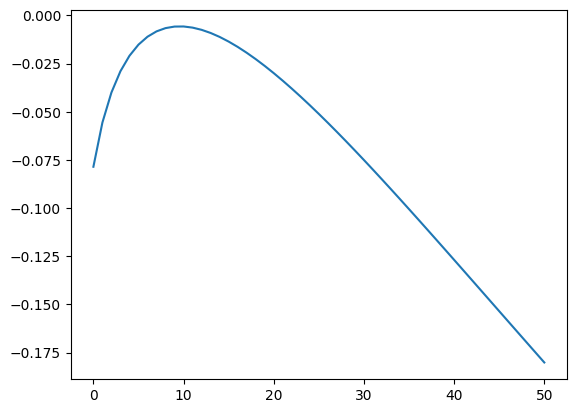

In [29]:
mean_results = np.mean(results, axis=1)
plt.plot(mean_results)

In [30]:
np.argmax(mean_results)

np.int64(10)

In [31]:
alpha_optimal = alpha_list[np.argmax(mean_results)]
print(f'Optimal alpha: {alpha_optimal}')

Optimal alpha: 10


# Analysis

In [37]:
clf = Ridge(alpha=alpha_optimal, fit_intercept=False,)
clf.fit(input_df, target_df)

,alpha,np.int64(10)
,fit_intercept,False
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Text(0.5, 1.0, 'Distribution of Coefficients')

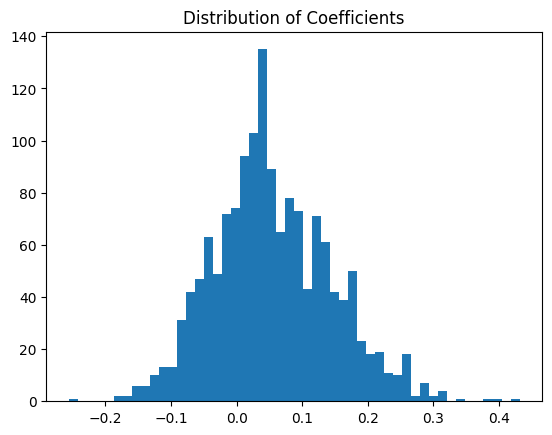

In [39]:
plt.hist(clf.coef_.flatten(), bins=50);
plt.title('Distribution of Coefficients')

In [43]:
attack_cols = [col for col in input_df.columns if '_attack' in col]
defense_cols = [col for col in input_df.columns if '_defense' in col]
print(len(attack_cols), len(defense_cols))

746 746


Text(0.5, 1.0, 'Attack coefficients')

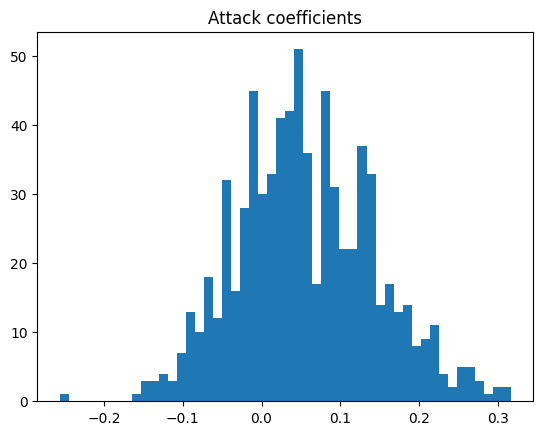

In [44]:
plt.hist(clf.coef_[0:len(attack_cols)].flatten(), bins=50);
plt.title('Attack coefficients')

Text(0.5, 1.0, 'Defense coefficients')

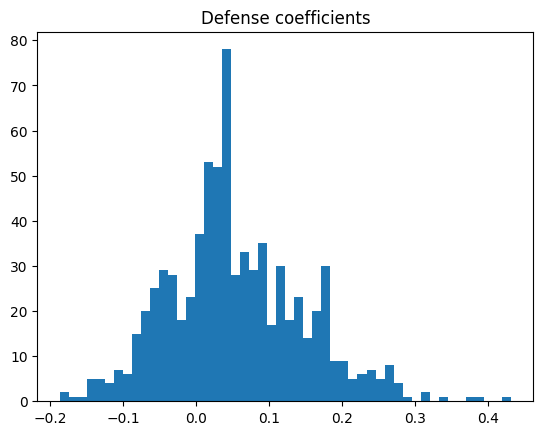

In [45]:
plt.hist(clf.coef_[len(attack_cols):].flatten(), bins=50);
plt.title('Defense coefficients')

In [46]:
print(input_df.columns[np.argmax(clf.coef_)])
print(np.max(clf.coef_))

HalonenArno_JJVepo_defense
0.43134712827480326


In [47]:
df[df['name']=='Halonen Arno']

,match_id,home_team,away_team,home_goals,away_goals,team,shirt_number,name,goals_scored,goals_conceded,nameTeamCombined
2812,3760624,AFC EMU,JJ Vepo,5,1,JJ Vepo,44.0,Halonen Arno,1,5,HalonenArno_JJVepo
2925,3760630,JJ Vepo,PK-35/Äijät,0,6,JJ Vepo,44.0,Halonen Arno,0,6,HalonenArno_JJVepo
3188,3760640,KOPSE/CRPS FC,JJ Vepo,6,4,JJ Vepo,44.0,Halonen Arno,4,6,HalonenArno_JJVepo
3329,3760647,MLHF/Reserves,JJ Vepo,7,1,JJ Vepo,91.0,Halonen Arno,1,7,HalonenArno_JJVepo
3640,3760660,JJ Vepo,AC StaSi/Europort,1,6,JJ Vepo,44.0,Halonen Arno,1,6,HalonenArno_JJVepo


In [48]:
print(input_df.columns[np.argmin(clf.coef_)])
print(np.min(clf.coef_))

KazmiMuhammadMujtaba_MLHF/Reserves_attack
-0.25598581317152835


In [49]:
df[df['name']=='Kazmi Muhammad Mujtaba']

,match_id,home_team,away_team,home_goals,away_goals,team,shirt_number,name,goals_scored,goals_conceded,nameTeamCombined
2772,3760623,LPS/7,MLHF/Reserves,0,0,MLHF/Reserves,11.0,Kazmi Muhammad Mujtaba,0,0,KazmiMuhammadMujtaba_MLHF/Reserves
3056,3760635,Valtti/4,MLHF/Reserves,1,1,MLHF/Reserves,11.0,Kazmi Muhammad Mujtaba,1,1,KazmiMuhammadMujtaba_MLHF/Reserves
3210,3760641,PK-35/Äijät,MLHF/Reserves,1,1,MLHF/Reserves,11.0,Kazmi Muhammad Mujtaba,1,1,KazmiMuhammadMujtaba_MLHF/Reserves


## Gather all results

In [91]:
coeff_df = pd.DataFrame(columns=['name', 'team', 'attack_coef', 'defense_coef', 'coef_diff'])

names = []
teams = []
aux_list = input_df.columns[:len(attack_cols)].str.split('_').to_list()
for item in aux_list:
    names.append(item[0])
    teams.append(item[1])
coeff_df['name'] = names
coeff_df['team'] = teams
coeff_df['attack_coef'] = clf.coef_[:len(attack_cols)]
coeff_df['defense_coef'] = clf.coef_[len(attack_cols):]
coeff_df['coef_diff'] = coeff_df['attack_coef'] - coeff_df['defense_coef']

# number of games played
n_games_list = []
for name in names:
    n_games = len(df[df['name'].str.replace(' ','') == name])
    n_games_list.append(n_games)
coeff_df['games_played'] = n_games_list

coeff_df

,name,team,attack_coef,defense_coef,coef_diff,games_played
0,RiiholaChristian,KiloIF/2,0.089938,0.183719,-0.093781,8
1,VäreJanne,KiloIF/2,0.030557,0.084562,-0.054005,2
2,LukkaJanne,KiloIF/2,0.057122,0.088713,-0.031590,1
3,RiiholaJesper,KiloIF/2,0.130836,0.196560,-0.065724,5
4,PelliJarkko,KiloIF/2,0.122216,0.141799,-0.019583,6
...,...,...,...,...,...,...
741,ShikhouIbrahim,MLHF/Reserves,-0.049284,0.045680,-0.094963,1
742,DagHenrik,PK-35/Äijät,-0.023007,0.045645,-0.068652,1
743,RinkinenLauri,KOPSE/CRPSFC,0.045645,-0.023007,0.068652,1
744,RabeeahMokhalad,KOPSE/CRPSFC,0.045645,-0.023007,0.068652,1


In [92]:
coeff_df.loc[coeff_df['team']=='Trikiinit', 'legend'] = 'Trikiinit'
coeff_df.loc[coeff_df['team']!='Trikiinit', 'legend'] = 'Other'

In [93]:
(
px.scatter(
    coeff_df[coeff_df['games_played'] >= 5], 
    x='attack_coef', 
    y='defense_coef', 
    hover_name='name', 
    color='legend')
.update_yaxes(autorange="reversed")
)

In [57]:
coeff_df[(coeff_df['name']=='ToivonenJaakko') | (coeff_df['name']=='WinbergMatias')]

,name,team,attack_coef,defense_coef,coef_diff,legend
30,ToivonenJaakko,Trikiinit,0.261361,0.084615,0.176746,Trikiinit
42,WinbergMatias,Trikiinit,0.261361,0.084615,0.176746,Trikiinit


In [58]:
coeff_df[coeff_df['team']=='Trikiinit'].sort_values(by='coef_diff', ascending=False)

,name,team,attack_coef,defense_coef,coef_diff,legend
39,TheoAuer,Trikiinit,0.191091,-0.151288,0.342379,Trikiinit
43,EiskopHindrek,Trikiinit,0.295231,0.020097,0.275133,Trikiinit
31,NieminenLauri,Trikiinit,0.249747,0.010631,0.239115,Trikiinit
37,KyyräTomi,Trikiinit,0.264195,0.046352,0.217843,Trikiinit
193,VirtanenTuomas,Trikiinit,0.214087,0.021404,0.192683,Trikiinit
35,AsikainenTopi,Trikiinit,0.218711,0.036886,0.181825,Trikiinit
40,PulliainenJoel,Trikiinit,0.218711,0.036886,0.181825,Trikiinit
36,WahlmanJere,Trikiinit,0.218711,0.036886,0.181825,Trikiinit
38,EklundMikael,Trikiinit,0.218711,0.036886,0.181825,Trikiinit
41,SorvariTeemu,Trikiinit,0.066464,-0.114849,0.181312,Trikiinit


In [59]:
df[df['name']=='Eiskop Hindrek']

,match_id,home_team,away_team,home_goals,away_goals,team,shirt_number,name,goals_scored,goals_conceded,nameTeamCombined
43,3749688,Trikiinit,OT-77,6,0,Trikiinit,23.0,Eiskop Hindrek,6,0,EiskopHindrek_Trikiinit
566,3749708,Trikiinit,FC POHU/Sober,5,0,Trikiinit,23.0,Eiskop Hindrek,5,0,EiskopHindrek_Trikiinit
669,3749712,Kilo IF/2,Trikiinit,4,6,Trikiinit,23.0,Eiskop Hindrek,6,4,EiskopHindrek_Trikiinit
789,3749718,Trikiinit,MoPo,4,1,Trikiinit,23.0,Eiskop Hindrek,4,1,EiskopHindrek_Trikiinit
1027,3749726,Kullervo,Trikiinit,1,5,Trikiinit,23.0,Eiskop Hindrek,5,1,EiskopHindrek_Trikiinit
1069,3749728,Trikiinit,Cosmos,2,1,Trikiinit,23.0,Eiskop Hindrek,2,1,EiskopHindrek_Trikiinit


In [89]:
n = 20
print(f'TOP {n} players (min 5 games played):')
coeff_df[coeff_df.games_played>=5].sort_values(by='coef_diff', ascending=False).head(n)

TOP 20 players (min 5 games played):


,name,team,attack_coef,defense_coef,coef_diff,games_played
39,TheoAuer,Trikiinit,0.191091,-0.151288,0.342379,5
550,HeinoNiko,MLHF/Reserves,0.310050,-0.030110,0.340160,5
92,HyttiLauri,Kullervo,0.191448,-0.127242,0.318690,5
220,RuuhonenRoope,FCLähiö,0.238447,-0.072228,0.310674,7
235,HassanKaafi,Valtti/TDJ,0.174056,-0.119073,0.293129,6
515,HämäläinenVeli-Matti,PK-35/Äijät,0.225810,-0.065152,0.290962,6
356,VirolainenJoonas,KäpylänSekunda,0.230706,-0.058556,0.289262,7
355,ArimoLauri,KäpylänSekunda,0.230706,-0.058556,0.289262,7
555,ManninenJere,MLHF/Reserves,0.316424,0.032531,0.283893,7
43,EiskopHindrek,Trikiinit,0.295231,0.020097,0.275133,6


In [68]:
aux = coeff_df.sort_values(by='coef_diff', ascending=False).head(n)
aux_name_list = aux.name.values

In [84]:
df[df['name'].str.replace(' ','') == (aux_name_list[7])]

,match_id,home_team,away_team,home_goals,away_goals,team,shirt_number,name,goals_scored,goals_conceded,nameTeamCombined
1236,3749734,ToTe/Arabia,HPS/Rangers,1,3,HPS/Rangers,12.0,Bhatia Arun,3,1,BhatiaArun_HPS/Rangers
1484,3749742,FC Pakila,HPS/Rangers,1,6,HPS/Rangers,12.0,Bhatia Arun,6,1,BhatiaArun_HPS/Rangers
2288,3749768,HPS/Rangers,Ponnistus/TK,2,2,HPS/Rangers,12.0,Bhatia Arun,2,2,BhatiaArun_HPS/Rangers
2547,3749776,Kullervo/Überkleber,HPS/Rangers,0,5,HPS/Rangers,12.0,Bhatia Arun,5,0,BhatiaArun_HPS/Rangers


In [129]:
home_team = 'Trikiinit'
away_team = 'Kullervo'

home_roster = df.loc[df.team == home_team, 'name'].head(15).values
away_roster = df.loc[df.team == away_team, 'name'].head(15).values
home_roster = [name.replace(' ', '') for name in home_roster]
away_roster = [name.replace(' ', '') for name in away_roster]

#home_roster.remove('AholaSami')
#home_roster.append('KoivulaJuho')

home_attack = coeff_df.loc[coeff_df['name'].isin(home_roster), 'attack_coef'].sum()
home_defense = coeff_df.loc[coeff_df['name'].isin(home_roster), 'defense_coef'].sum()
away_attack = coeff_df.loc[coeff_df['name'].isin(away_roster), 'attack_coef'].sum()
away_defense = coeff_df.loc[coeff_df['name'].isin(away_roster), 'defense_coef'].sum()
print(f'Home team: {home_team} - Attack: {home_attack:.2f}, Defense: {home_defense:.2f}')
print(f'Away team: {away_team} - Attack: {away_attack:.2f}, Defense: {away_defense:.2f}')
home_score = home_attack + away_defense
away_score = away_attack + home_defense
print(f'Predicted score: {home_team} {home_score:.2f} - {away_team} {away_score:.2f}')
print()
print('Home roster:')
print(home_roster)
print()
print('Away roster:')
print(away_roster)

Home team: Trikiinit - Attack: 2.76, Defense: 0.32
Away team: Kullervo - Attack: 2.01, Defense: 0.06
Predicted score: Trikiinit 2.83 - Kullervo 2.33

Home roster:
['ToivonenJaakko', 'NieminenLauri', 'VattulainenTaisto', 'RantalainenPasi', 'AholaSami', 'AsikainenTopi', 'WahlmanJere', 'KyyräTomi', 'EklundMikael', 'TheoAuer', 'PulliainenJoel', 'SorvariTeemu', 'WinbergMatias', 'EiskopHindrek', 'MelanderJohannes']

Away roster:
['AutioHarri', 'Virtanen-MullenRingo', 'AnttilaTopi', 'TurkkaAaro', 'AnttilaRoope', 'KallioVeikko', 'OtavaLeevi', 'TorvinenVeeti', 'TuliainenMika', 'KulmalaMika', 'NurminenSeveri', 'HyttiLauri', 'SuvilaaksoVille', 'VäistöJoona', 'Virtanen-MullenRingo']
